In [2]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
with open('../tracker_stubs/ball_detections.pkl','rb') as f:
    ball_positions = pickle.load(f)

In [4]:
ball_positions = [x.get(1,[]) for x in ball_positions]
df_ball_positions = pd.DataFrame(ball_positions,columns=['x1','y1','x2','y2'])

df_ball_positions = df_ball_positions.interpolate()
df_ball_positions = df_ball_positions.bfill()

In [5]:
df_ball_positions

,x1,y1,x2,y2
0,891.725098,615.366394,912.613403,640.471985
1,891.725098,615.366394,912.613403,640.471985
2,876.354889,631.394806,896.710632,655.662048
3,860.984680,647.423218,880.807861,670.852112
4,847.285258,659.988342,867.126261,682.788574
...,...,...,...,...
209,1183.434814,246.021484,1200.672363,265.808899
210,1182.925293,232.252258,1197.805664,247.863190
211,1181.628418,224.418976,1197.703613,241.781494
212,1179.626709,212.665649,1196.456665,231.089172


In [7]:

df_ball_positions['mid_y'] = (df_ball_positions['y1'] + df_ball_positions['y2'])/2
df_ball_positions['mid_y_rolling_mean'] = df_ball_positions['mid_y'].rolling(window=5, min_periods=1, center=False).mean()

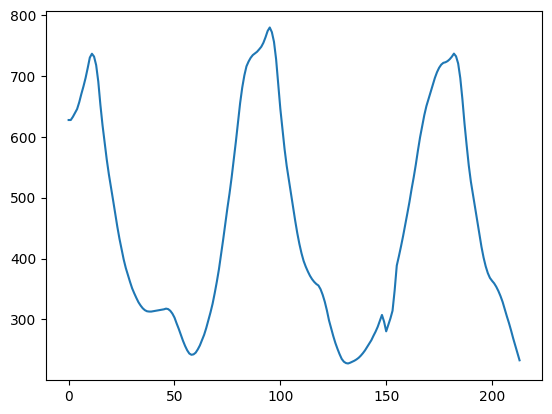

In [8]:

# plot mid_y_rolling_mean
plt.plot(df_ball_positions['mid_y_rolling_mean'])

In [9]:

df_ball_positions['delta_y'] = df_ball_positions['mid_y_rolling_mean'].diff()

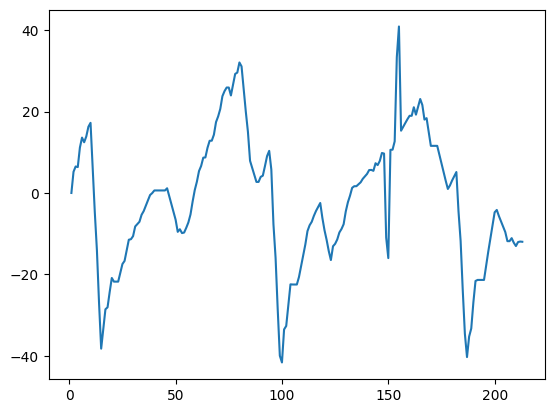

In [10]:

# plot mid_y_rolling_mean
plt.plot(df_ball_positions['delta_y'])

In [11]:

df_ball_positions['ball_hit']=0

In [12]:
minimum_change_frames_for_hit = 25
for i in range(1,len(df_ball_positions)- int(minimum_change_frames_for_hit*1.2) ):
    negative_position_change = df_ball_positions['delta_y'].iloc[i] >0 and df_ball_positions['delta_y'].iloc[i+1] <0
    positive_position_change = df_ball_positions['delta_y'].iloc[i] <0 and df_ball_positions['delta_y'].iloc[i+1] >0

    if negative_position_change or positive_position_change:
        change_count = 0 
        for change_frame in range(i+1, i+int(minimum_change_frames_for_hit*1.2)+1):
            negative_position_change_following_frame = df_ball_positions['delta_y'].iloc[i] >0 and df_ball_positions['delta_y'].iloc[change_frame] <0
            positive_position_change_following_frame = df_ball_positions['delta_y'].iloc[i] <0 and df_ball_positions['delta_y'].iloc[change_frame] >0

            if negative_position_change and negative_position_change_following_frame:
                change_count+=1
            elif positive_position_change and positive_position_change_following_frame:
                change_count+=1
    
        if change_count>minimum_change_frames_for_hit-1:
            df_ball_positions['ball_hit'].iloc[i] = 1

frame_nums_with_ball_hits = df_ball_positions[df_ball_positions['ball_hit']==1].index.tolist()

C:\Users\Yaswanth\AppData\Local\Temp\ipykernel_9380\3752280353.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ball_positions['ball_hit'].iloc[i] = 1


In [13]:

df_ball_positions[df_ball_positions['ball_hit']==1]

,x1,y1,x2,y2,mid_y,mid_y_rolling_mean,delta_y,ball_hit
11,776.324524,715.843750,798.122864,739.505371,727.674561,736.873920,6.356903,1
58,922.467957,231.014786,946.044983,255.677444,243.346115,241.928415,-2.107291,1
95,615.710083,766.630371,641.906982,799.832153,783.231262,780.051288,5.754492,1
132,720.186523,220.901550,738.749756,240.228218,230.564884,227.645612,-0.665879,1
150,603.642151,205.379288,619.916321,220.941147,213.160217,280.488716,-15.993170,1
182,1294.089600,738.755310,1313.968994,759.788269,749.271790,737.071548,5.139606,1


In [18]:
frame_num_hits = df_ball_positions[df_ball_positions['ball_hit']==1].index.tolist()